In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#import random
%matplotlib inline
from matplotlib import animation
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed
import scipy.integrate as integrate

from matplotlib import animation
from IPython.display import HTML

In [2]:
integrate.quad(lambda x: 2*np.cos(np.pi*x), -0.5, 0)
integrate.quad(lambda x: 2*np.sin(2*np.pi*x), -0.5, 0)

(-0.6366197723675814, 7.067899292141149e-15)

In [12]:
num=20;
A_n=np.zeros(num)
for i in range(num):
    if i%4 == 0:
        pass
    elif i%2 == 0:
        A_n[i] = integrate.quad(lambda x: 2*np.sin(i*np.pi*x), -0.5, 0)[0];
    else:
        A_n[i] = integrate.quad(lambda x: 2*np.cos(i*np.pi*x), -0.5, 0)[0];
        
A_n


array([ 0.        ,  0.63661977, -0.63661977, -0.21220659,  0.        ,
        0.12732395, -0.21220659, -0.09094568,  0.        ,  0.07073553,
       -0.12732395, -0.05787452,  0.        ,  0.04897075, -0.09094568,
       -0.04244132,  0.        ,  0.03744822, -0.07073553, -0.0335063 ])

In [8]:
A_n**2

array([ 0.        ,  0.40528473,  0.40528473,  0.04503164,  0.        ,
        0.01621139,  0.04503164,  0.00827112,  0.        ,  0.00500352,
        0.01621139,  0.00334946,  0.        ,  0.00239813,  0.00827112,
        0.00180127,  0.        ,  0.00140237,  0.00500352,  0.00112267])

In [4]:
np.sum(A_n**2)

0.96967868914627176

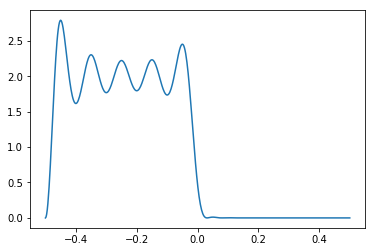

In [13]:
a=1
x_s=500
x = np.linspace(-a/2, a/2, x_s)
psi=0*x
t=0

for i in range(num):
    if i%4 == 0:
        pass
    elif i%2 == 0:
        psi=psi+A_n[i]*np.sqrt(2)*np.sin(i*np.pi*x)*np.exp(1j*np.pi**2*t*i*i/2)
    else:
        psi=psi+A_n[i]*np.sqrt(2)*np.cos(i*np.pi*x)*np.exp(1j*np.pi**2*t*i*i/2)
        
prob=np.real(psi*np.conj(psi))      
plt.plot(x,prob)

In [14]:
myfigsize=(8,6)

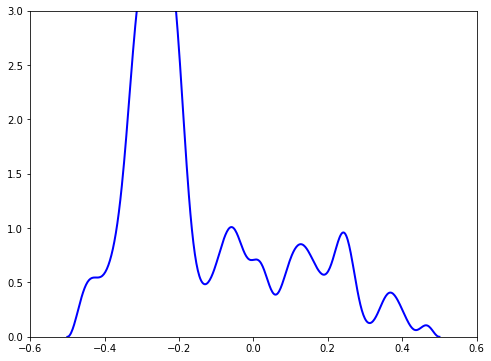

In [15]:
outerlim = 0.6
fig = plt.figure(figsize=myfigsize)
ax = plt.axes(xlim=(-outerlim, outerlim), ylim=(0, 3))
line, = ax.plot([], [], lw=2, color='blue')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially

a=1
x_s=500

def animate(t):
    x = np.linspace(-a/2, a/2, x_s)
    psi=0*x
    for i in range(num):
        if i%4 == 0:
            pass
        elif i%2 == 0:
            psi=psi+A_n[i]*np.sqrt(2)*np.sin(i*np.pi*x)*np.exp(-1j*np.pi**2*t*i*i/200)
        else:
            psi=psi+A_n[i]*np.sqrt(2)*np.cos(i*np.pi*x)*np.exp(-1j*np.pi**2*t*i*i/200)
        
        y=np.real(psi*np.conj(psi))      

    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=50, blit=True)
HTML(ani.to_jshtml())
#ani